In [1]:
import torch
import numpy as np

from RTRBM.RTRBM_batches import RTRBM
from RBMs.Codes.RBMs import RBMs
from loaddata import *

In [2]:
spikes, _, _, _, _ = load_data()

### Learning parameters

In [3]:
n_hid = 128 # number of neurons in the hidden layer
n_vis = 256 # input size
T = 500

lr = 0.01 # learning rate
momentum = 0.9
weightcost = 0.0002
CDk = 10
n_epochs = 1000
batch_size = 64

spike_thres = 0.15
spikes[spikes>spike_thres] = 1
spikes[spikes<spike_thres] = 0
tmp = np.argsort(np.sum(spikes,0))[::-1]
spikes = spikes[:,tmp]
spikes = spikes.T
    
data = torch.tensor(spikes[:n_vis, :T])

# 128 Hidden nodes, 100 epochs

## cRBM

In [18]:
cRBM = RBMs(data, N_H = 128)
cRBM = cRBM.train_cRBM(cRBM, data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:36<00:00,  1.03it/s]


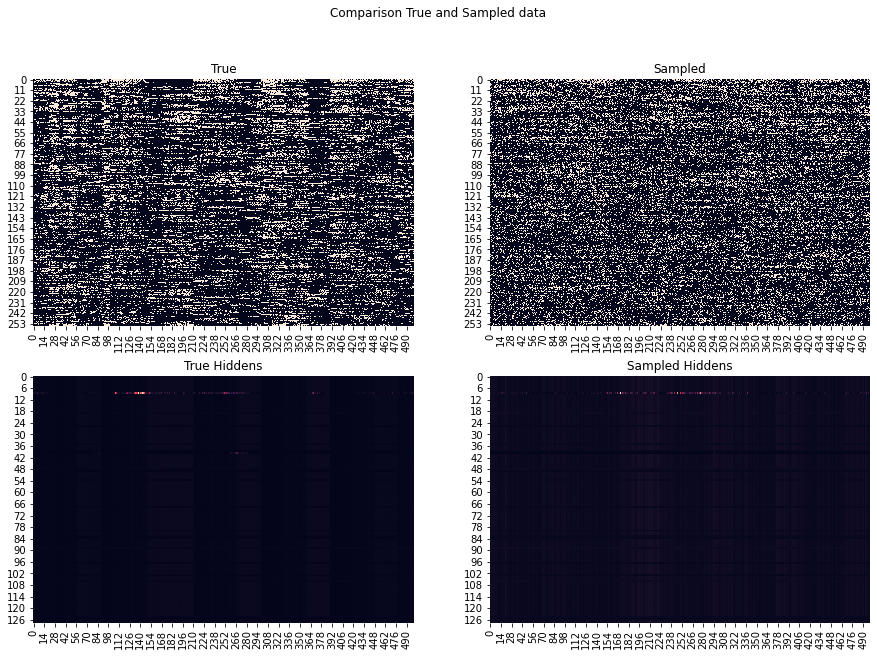

In [19]:
from plots import *

H_data, _ = cRBM.visible_to_hidden(data.T)
H_sampled, _ = cRBM.visible_to_hidden(cRBM.v_infer.T)
plot_true_sampled(data, H_data.T, cRBM.v_infer, H_sampled.T)

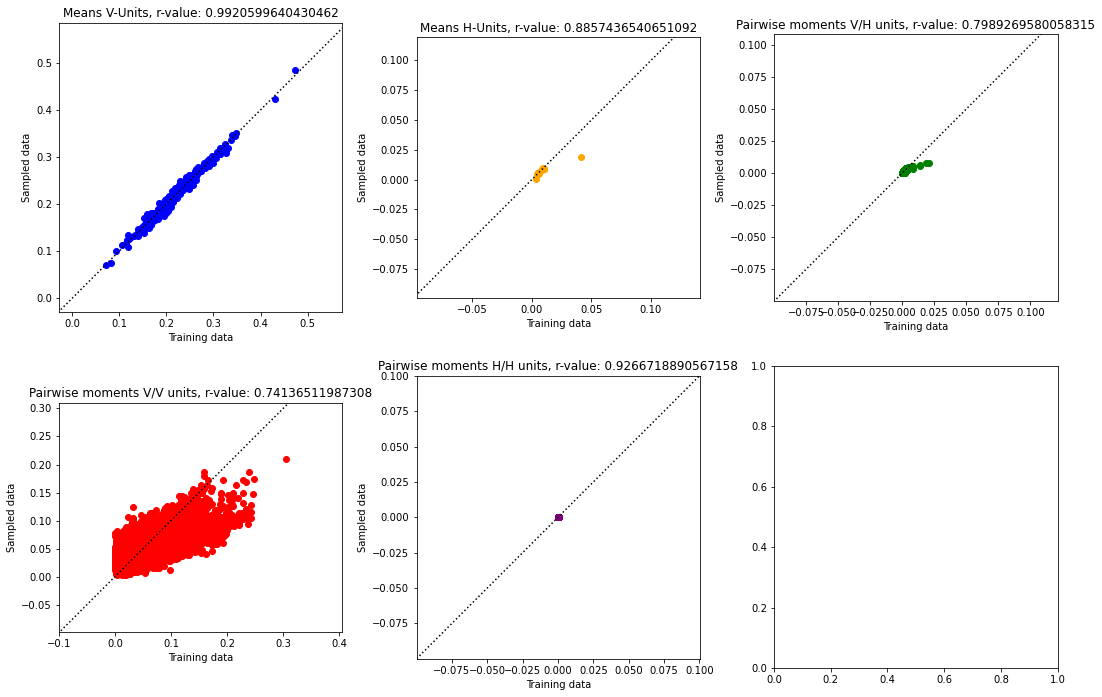

In [20]:
plot_moments(data, H_data.T, cRBM.v_infer, H_sampled.T)

In [21]:
get_reconstruction_error(data, cRBM.v_infer)

tensor(0.3321)

## cRTRBM

In [4]:
rtrbm = RTRBM(data)
rtrbm.learn(128, n_epochs=100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:10<00:00,  1.90s/it]


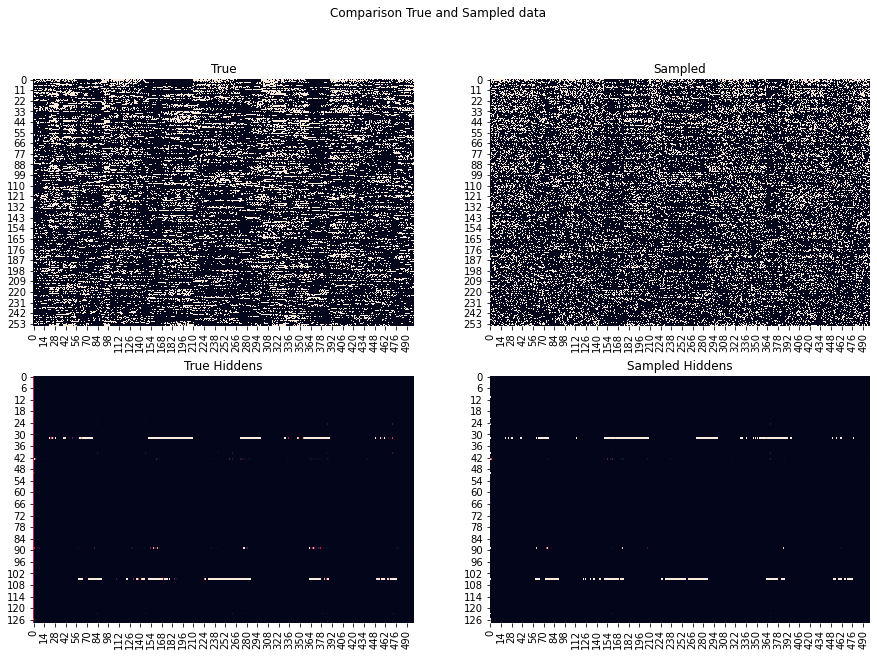

In [9]:
from plots import *
H_data_rtrbm = rtrbm.visible_to_hidden(data, T)
H_sampled_rtrbm = rtrbm.visible_to_hidden(rtrbm.v_infer, T)

plot_true_sampled(data, H_data_rtrbm, rtrbm.v_infer, H_sampled_rtrbm)

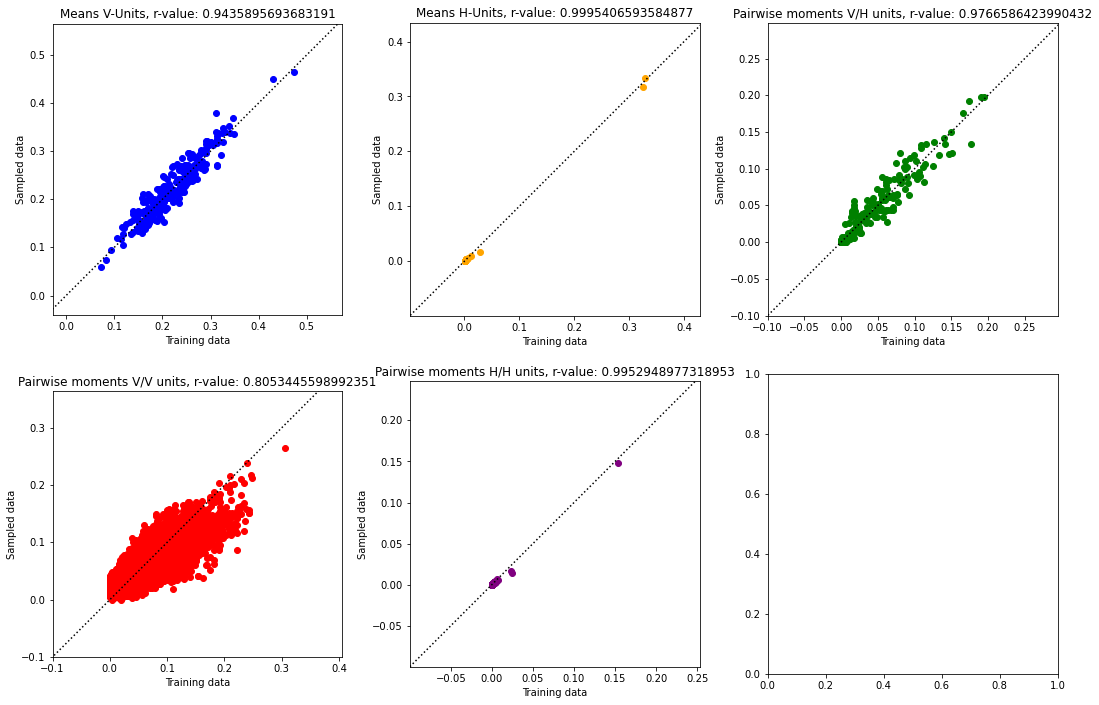

In [10]:
plot_moments(data, H_data_rtrbm, rtrbm.v_infer, H_sampled_rtrbm)

In [16]:
def get_reconstruction_error(data, samples):
        
        if data.shape != samples.shape:
            raise ValueError('The shape of true and sampled data must be the same.')
        
        reconstruction_error = torch.sum((data - samples)**2) / samples.shape[0] / samples.shape[1]
        
        return reconstruction_error

In [17]:
get_reconstruction_error(data, rtrbm.v_infer)

tensor(0.3090)

# 10 hidden nodes, 1000 epochs

## cRBM

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:54<00:00,  2.11it/s]


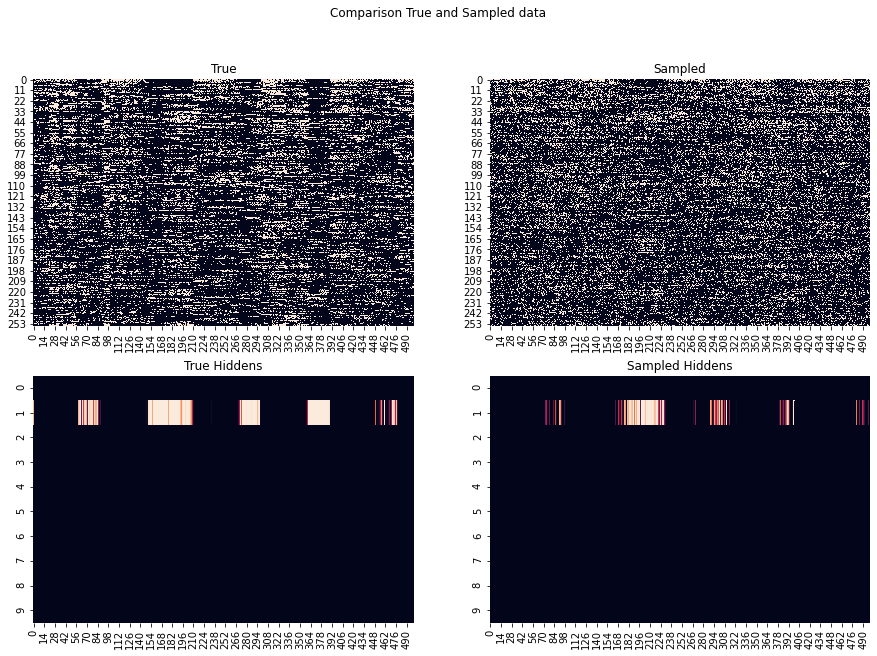

In [34]:
cRBM = RBMs(data, N_H = 10)
cRBM = cRBM.train_cRBM(cRBM, data, n_epochs = 1000)

H_data, _ = cRBM.visible_to_hidden(data.T)
H_sampled, _ = cRBM.visible_to_hidden(cRBM.v_infer.T)
plot_true_sampled(data, H_data.T, cRBM.v_infer, H_sampled.T)

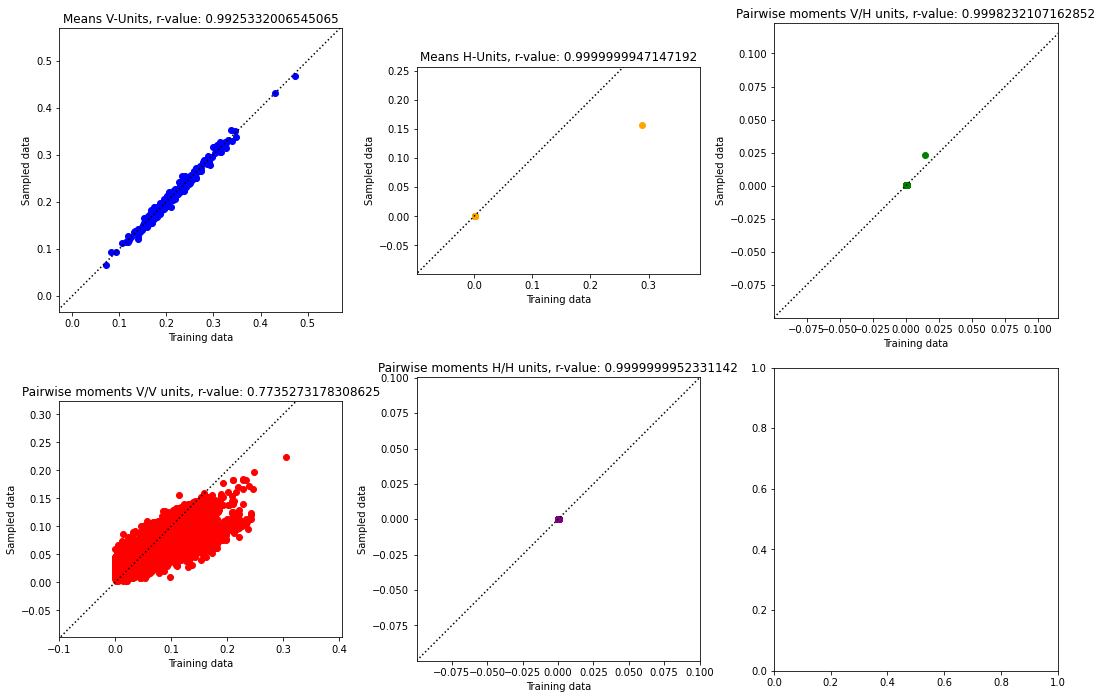

In [35]:
plot_moments(data, H_data.T, cRBM.v_infer, H_sampled.T)

In [36]:
get_reconstruction_error(data, cRBM.v_infer)

tensor(0.3295)

## cRTRBM

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:54<00:00,  5.72it/s]


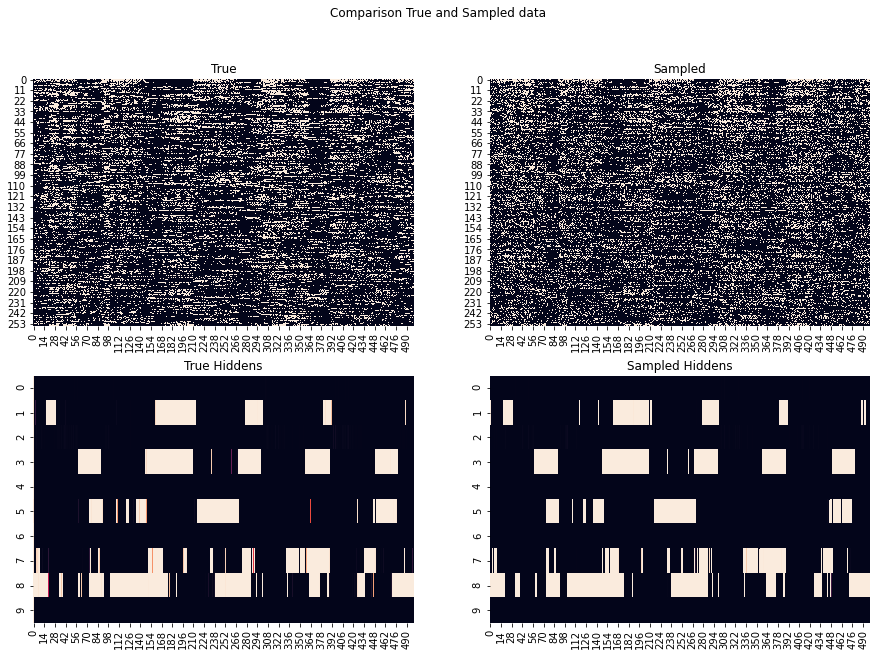

In [31]:
rtrbm = RTRBM(data)
rtrbm.learn(10, n_epochs=1000)

H_data_rtrbm = rtrbm.visible_to_hidden(data, T)
H_sampled_rtrbm = rtrbm.visible_to_hidden(rtrbm.v_infer, T)

plot_true_sampled(data, H_data_rtrbm, rtrbm.v_infer, H_sampled_rtrbm)

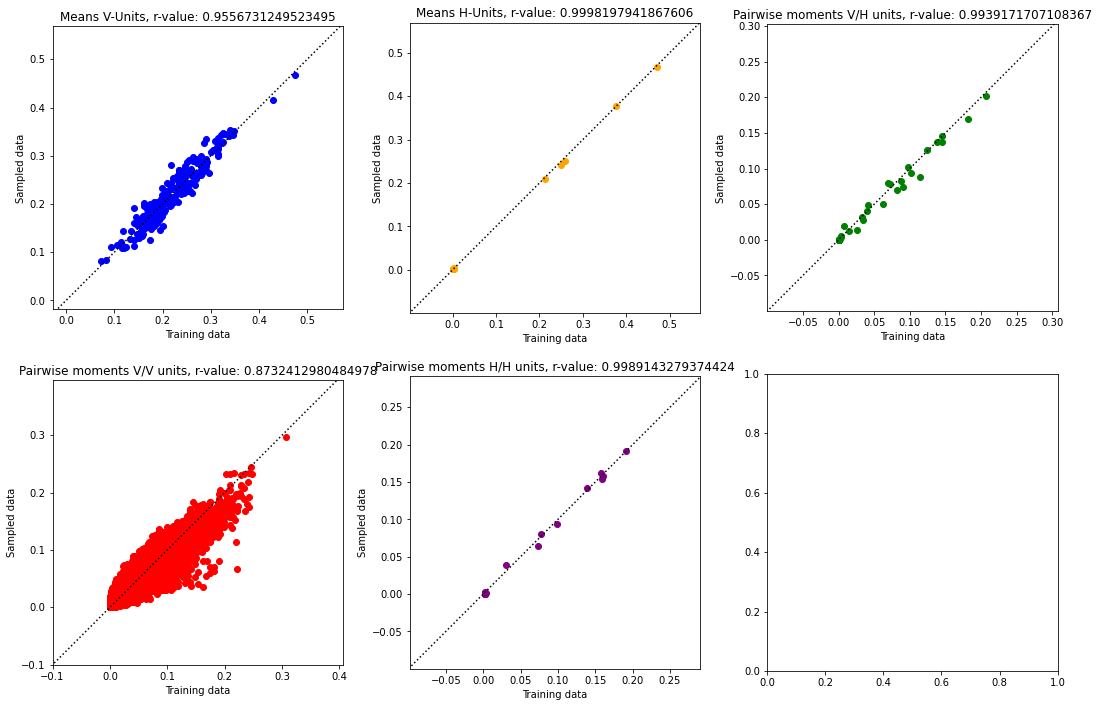

In [32]:
plot_moments(data, H_data_rtrbm, rtrbm.v_infer, H_sampled_rtrbm)

In [33]:
get_reconstruction_error(data, rtrbm.v_infer)

tensor(0.2827)

In [1]:
from plots import *
plot_weights_log_distribution_compare(rtrbm.W, cRBM.W, label1='cRTRBM', label2='cRBM', ymin = 1e-2, ymax=100)

NameError: name 'rtrbm' is not defined